<a href="https://colab.research.google.com/github/farfaness/dimension_reduction_and_clutering/blob/master/Principal_Components_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the needed librairies

In [0]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
from sklearn import decomposition, preprocessing

## Definition of functions to display the variables correlation cercle, the factorial planes to project the individuals, and the scree plot of the principal components eigenvalues

source : https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees/5345201-tp-realisez-une-acp

In [0]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

# Let's compute the PCA!

PCA on the course followed on openclassrooom

In [0]:
# To download the dataset from my google drive : mout my drive
from google.colab import drive
drive.mount('/content/drive')

In [28]:
ls

bag_of_words.csv  my_courses.csv  Principal_Components_Analysis.ipynb
courses_info.csv  mystery.csv


In [23]:
# Read the file
path = '/content/drive/My Drive/reduction_dimension_et_clustering/my_courses.csv'
data = pd.read_csv(path, decimal=".",index_col=0)
data.head()

,inscription,progression,moyenneDeClasse,duree,difficulte,nbChapitres,ratioQuizEvaluation,nbEvaluations,derniereMiseAJour,idCours
titreCours,,,,,,,,,,
Classez_et_segmentez_des_données_visuelles,29,34,NaN,15,3,11,0.666667,3,22,4470531
Initiez-vous_à_la_statistique_inférentielle,55,4,86.0,12,2,21,0.750000,4,8,4525306
Découvrez_les_librairies_Python_pour_la_Data_Science,64,64,96.0,10,2,8,0.000000,2,57,4452741
Devenez_mentor_sur_OpenClassrooms,76,100,91.0,6,1,12,1.000000,3,29,3595541
Initiez-vous_à_l'algèbre_relationnelle_avec_le_langage_SQL,192,14,92.0,20,2,25,0.500000,4,25,4449026


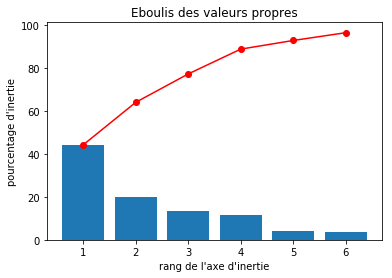

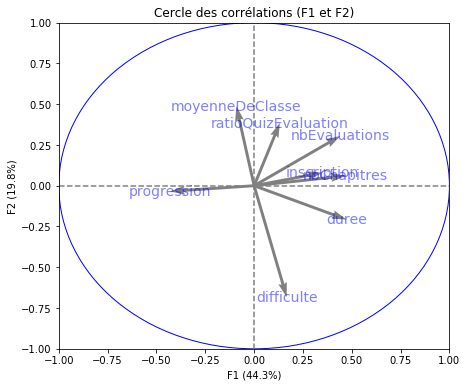

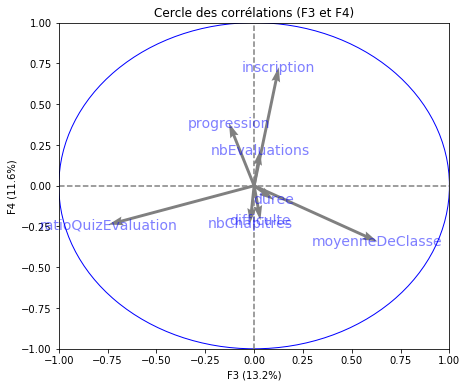

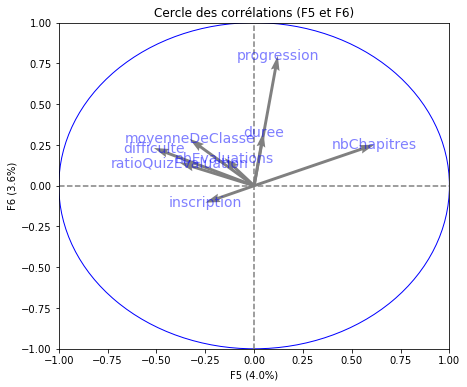

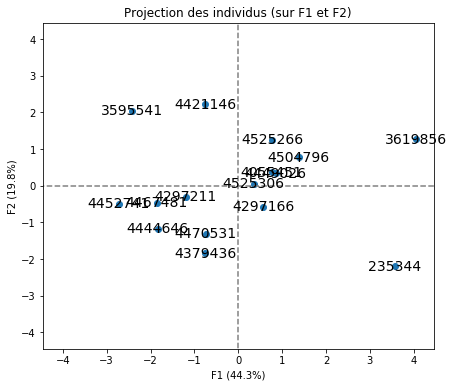

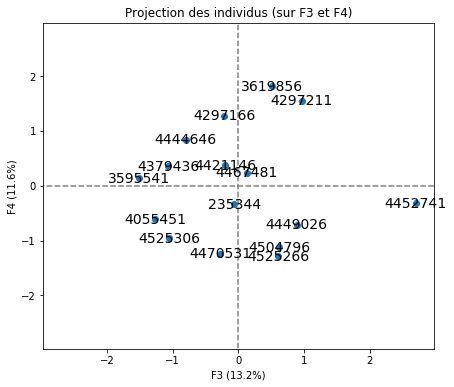

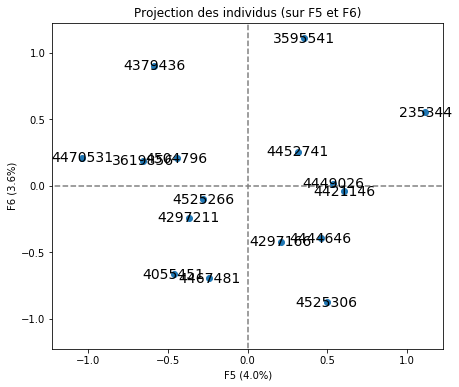

In [24]:
# choix du nombre de composantes à calculer
n_comp = 6

# selection des colonnes à prendre en compte dans l'ACP
data_pca = data[["inscription","progression","moyenneDeClasse","duree","difficulte","nbChapitres","ratioQuizEvaluation","nbEvaluations"]]

# préparation des données pour l'ACP
data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
names = data["idCours"] # ou data.index pour avoir les intitulés
features = data.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(names))

plt.show()

# Let's compute another PCA!

PCA on a mystery dataset

In [22]:
# Read the file
path = '/content/drive/My Drive/reduction_dimension_et_clustering/mystery.csv'
data2 = pd.read_csv(path)
data2.head()

,x,y,z
0,-7.988979,15.633928,-5.726221
1,0.108386,-3.456144,22.272791
2,1.565447,10.915797,29.040207
3,0.765086,35.831929,20.892023
4,-8.880745,20.989331,8.337199


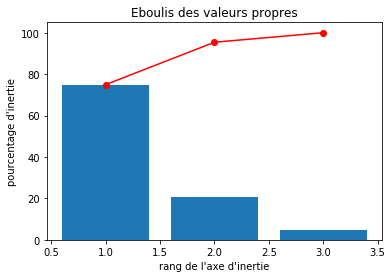

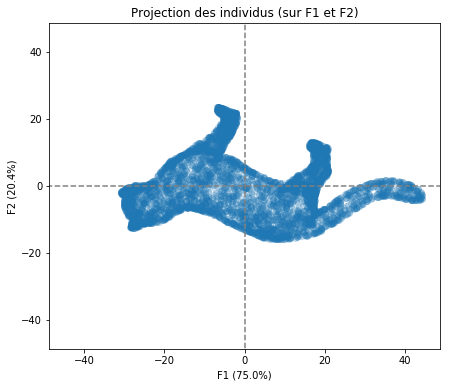

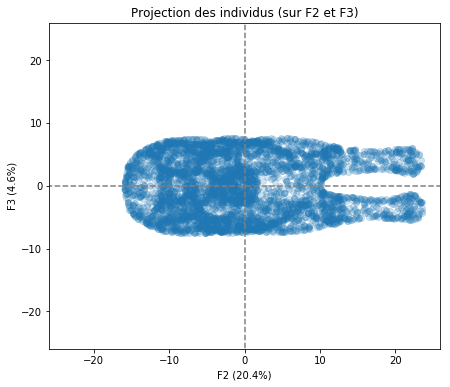

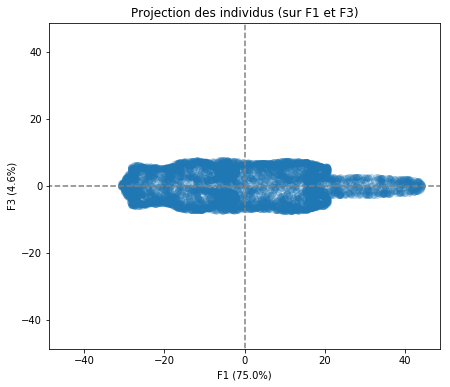

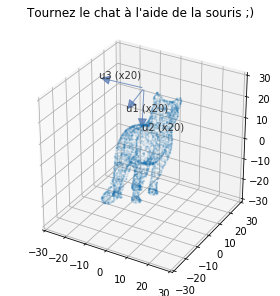

In [26]:
# choix du nombre de composantes à calculer
n_comp = 3

# import de l'échantillon
X = data2.values

# Réduire n'est ici pas nécessaire car les variables sont exprimées dans la même unité. 
# On se contente juste de centrer les données, ce qui est obligatoire pour une ACP.
X = preprocessing.StandardScaler(with_std=False).fit_transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components= n_comp)
pca.fit(X)

# Eboulis des valeurs propres
display_scree_plot(pca)

# projection des individus
X_projected = pca.transform(X)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(1,2),(0,2)], alpha = 0.2)


#################################
############ En 3D ##############
#################################

from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')
ax.set_xlim(-30,30)
ax.set_ylim(-30,30)
ax.set_zlim(-30,30)
fig.tight_layout()
x, y, z = X.T
ax.scatter(x, y, z, alpha = 0.1, s=1)
plt.title("Tournez le chat à l'aide de la souris ;)")

# Affichage des vecteurs propres (axes principaux d'inertie)
pcs = pca.components_
for i in range(3):
    eigen_vector_x20 = pcs[i] * 20
    eigen_vector = Arrow3D([0, eigen_vector_x20[0]], [0, eigen_vector_x20[1]],[30, 30+eigen_vector_x20[2]], mutation_scale=20, lw=1, arrowstyle="-|>", color="#4c72b0", alpha=.7)
    ax.add_artist(eigen_vector)
    ax.text3D(eigen_vector_x20[0],eigen_vector_x20[1],30+eigen_vector_x20[2],"u{} (x20)".format(i+1), color="#333333")

plt.show()

# Let's compute another PCA!

PCA on bags-of-words

In [27]:
# Read the file
path = '/content/drive/My Drive/reduction_dimension_et_clustering/bag_of_words.csv'
data3 = pd.read_csv(path, index_col = 0)
data3.head()

,aaaa,abandonner,abattement,abbr,abc,abondement,abonnement,abonner,abonnés,aborder,aborderons,abordé,abordées,abordés,about,aboutir,aboutit,above,abrégé,abs,abscisse,abscisses,absence,absences,absent,absolu,absolue,absolument,absolute,abstract,abstraction,abstracttype,abstrait,abstraite,abstraites,abus,abuser,accent,accents,accept,...,évaluer,évaluez,évalué,évaluée,évaluées,évalués,éventuel,éventuelle,éventuellement,éventuelles,éventuels,évidemment,évidence,évident,évidente,évitant,évite,éviter,évitera,évitez,évolue,évoluent,évoluer,évolutif,évolutifs,évolution,évolutions,évolué,évoque,évoquer,évoqué,évoquées,évoqués,évènement,évènements,événement,événements,êtres,œil,œuvre
Concevez des architectures Big Data,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.002343,0.0,0.0000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000469,0.000000,0.0,0.0,0.0,0.0,0.0,0.000469,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.000469,0.0000,0.0,0.001406,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000469,0.0,0.0000,0.0,0.0,0.000469,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000469,0.000000,0.000000,0.000000
Apprenez à coder avec JavaScript,0.000000,0.0,0.0,0.0,0.000499,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0001,0.0,0.000200,0.0,0.000000,0.0,0.000200,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000100,0.0,...,0.000000,0.0,0.0,0.0002,0.0,0.0,0.0,0.0,0.000200,0.0003,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000599,0.000000,0.000000,0.000100,0.0,0.0001,0.0,0.0,0.000100,0.0001,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0001,0.0,0.000000,0.000000,0.000000,0.000000
Concevez votre site web avec PHP et MySQL,0.000524,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000058,0.000029,0.0,0.0,0.0,0.000000,0.0,0.0000,0.0,0.000000,0.0,0.000175,0.0,0.000029,0.0,0.0,0.000204,0.000058,0.000349,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000058,0.000116,0.0,...,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.000087,0.0000,0.0,0.000000,0.0,0.000087,0.0,0.000029,0.000145,0.000786,0.000029,0.000029,0.000000,0.0,0.0000,0.0,0.0,0.000000,0.0000,0.000029,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.000000,0.000087,0.000000
Réussir sa campagne d'e-mailing avec MailChimp,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.020408,0.020408,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.0,0.0,0.000000,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.000000,0.000000,0.000000
Utilisez des modèles supervisés non linéaires,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0000,0.0,0.000325,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000976,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000325,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0,0.000325,0.0,0.000000,0.0,0.000325,0.000000,0.000651,0.000000,0.000000,0.000000,0.0,0.0000,0.0,0.0,0.000325,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.000325,0.000000,0.000651


In [29]:
path = '/content/drive/My Drive/reduction_dimension_et_clustering/courses_info.csv'
data4 = pd.read_csv(path, index_col = 0)
data4.head()

,charge-e-de-gestion-des-ressources-humaines,manager-rh,gestionnaire-de-paie,data-architect,developpeur-se-dapplication-python,developpeur-web-junior,community-manager,responsable-marketing-operationnel,developpeur-se-d-application-php-symfony,data-scientist,expert-e-en-strategie-marketing-et-communication,data-analyst,theme
title,,,,,,,,,,,,,
Apprenez à gérer les conflits,True,True,True,False,False,False,False,False,False,False,False,False,RH
Réalisez des calculs distribués sur des données massives,False,False,False,True,False,False,False,False,False,False,False,False,data
Managez une équipe au quotidien,False,True,False,False,False,False,False,False,False,False,False,False,RH
Gérez votre code avec Git et GitHub,False,False,False,False,True,True,False,False,False,False,False,False,dev
Lancez une campagne de publicité avec Google AdWords,False,False,False,False,False,False,True,True,False,False,False,False,marketing


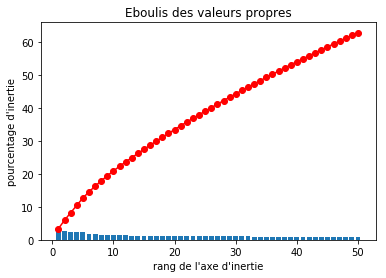

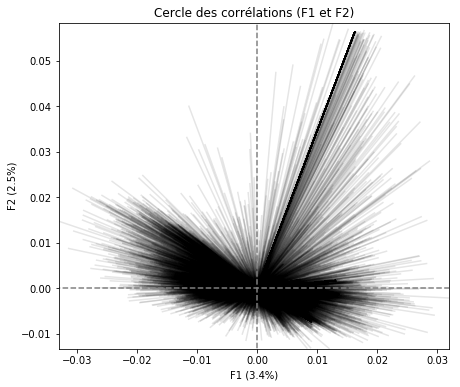

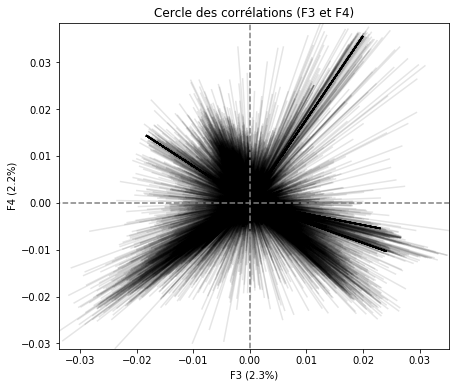

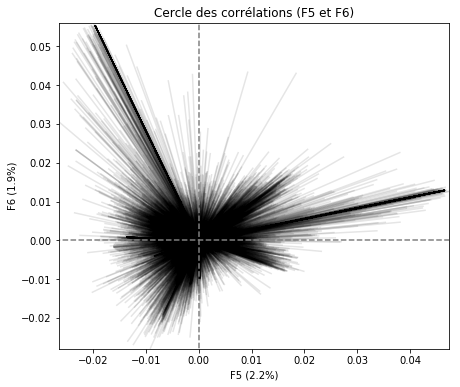

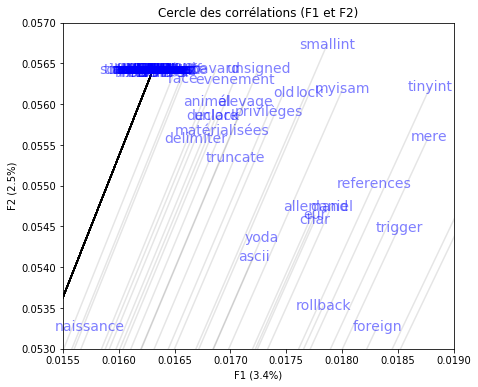

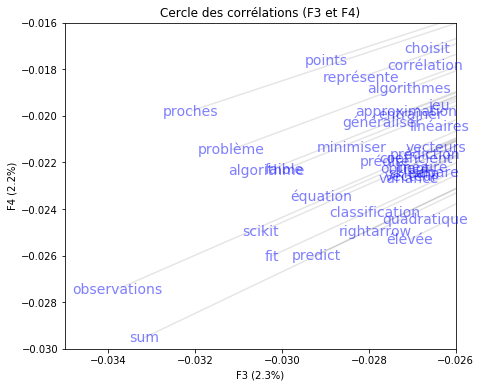

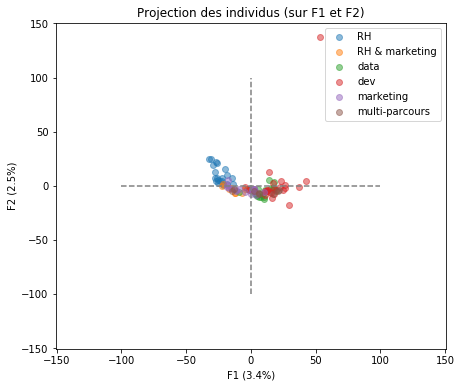

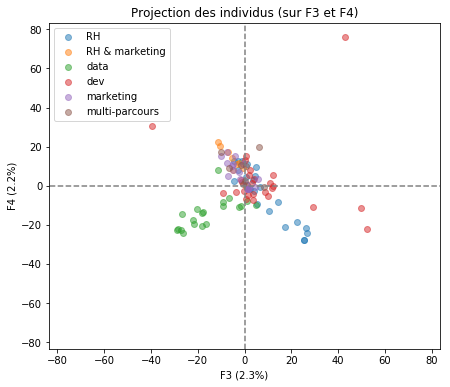

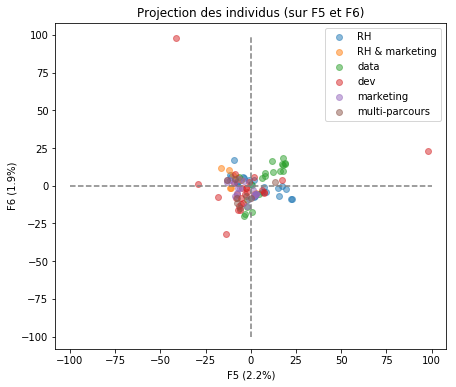

In [30]:
# choix du nombre de composantes à calculer
n_comp = 50

# Theme du ou des parcours auxquels appartient le cours (data, developpement, marketing, etc.)
theme = [data4.loc[course_id, "theme"] for course_id in data3.index]

# préparation des données pour l'ACP
X = data3.values
features = data3.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)])
display_circles(pcs, n_comp, pca, [(0,1)], lims=[.0155, .019, 0.053, .057], labels = np.array(features))
display_circles(pcs, n_comp, pca, [(2,3)], lims=[-.035, -.026, -.03,-.016], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], illustrative_var = theme, alpha = 0.5)

plt.show()